###### In this project we are going to do sales analysis of an offline gadget store 
###### we have csv files diffrent file for every diffrent month that means we have 12 csv files.
###### our task is to give answers of quetions ansked below from given data.

## Questions
##### Question 1: What was the best month for sales? How much was earned that month? 
##### Question 2: What city sold the most product?
##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
##### Question 4: which product generating most revanue?
##### Question 5: Which products are most often sold together?
##### Question 6: What product sold the most? 
##### Question 7: Why do you think it sold the most?

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

### Merge data from each month into one CSV

In [2]:
path = '.\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
files = listdir(path)
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
sales = pd.DataFrame()
for i in range(len(files)):
    df = pd.read_csv(path+"\\"+files[i])
    sales = pd.concat([sales, df])

### Read in updated dataframe

In [4]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### save the data in local system

In [5]:
sales.to_csv('all_month_sales.csv', index = 0)

### describing data

In [6]:
sales.shape

(186850, 6)

In [7]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Clean up the data!

#### Drop rows of NAN

In [9]:
temp_df = sales[sales.isnull()==1]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sales = sales.dropna()

In [11]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Add month column

In [12]:
sales['month'] = sales['Order Date'].str[0:2]
sales.head()

C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
# sales['month'] = sales['month'].astype('int32')
# this is code is getting error 

In [14]:
temp_df = sales[sales['month'] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [15]:
sales = sales[sales['month'] != 'Or']

In [16]:
sales['month'] = sales['month'].astype('int32')

C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   city              185950 non-null  object        
 8   total sales       185950 non-null  float64       
 9   hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 14.2+ MB


### Add city column

In [18]:
sales['city'] = sales['Purchase Address'].apply(lambda x : x.split(', ')[1])+' ('+sales['Purchase Address'].apply(lambda x : x.split(', ')[2]).apply(lambda x : x.split(' ')[0])+')'
sales.head()

C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Add total sales column

In [19]:
sales['Price Each'] = sales['Price Each'].astype('float')
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int')
sales['total sales'] = sales['Price Each']*sales['Quantity Ordered']
sales.head()

C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


### Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [20]:
sales_by_month = sales.groupby('month').sum()
sales_by_month

,Quantity Ordered,Price Each,total sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


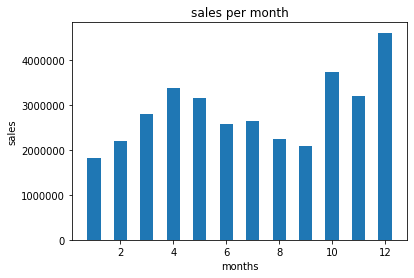

In [21]:
month = [month for month, i in sales.groupby('month')]
plt.bar(month, sales_by_month['total sales'], width=.5)
plt.title('sales per month')
plt.ylabel('sales')
plt.xlabel('months')
plt.show()

## Answer :-
#### Best month for sales is 12th month means december total sales happen in dec is higher than 4500000 
#### followed by october with around 3700000 sales.



### Question 2: What city sold the most product?

In [22]:
sales_by_city = sales.groupby('city').sum()
sales_by_city

,Quantity Ordered,Price Each,month,total sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


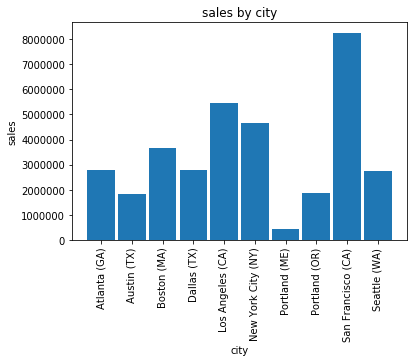

In [23]:
city = [city for city, df in sales.groupby('city')]
plt.bar(city,sales_by_city['total sales'], width=.9,)
plt.title('sales by city')
plt.xticks(city, rotation ='vertical' )
plt.xlabel('city')
plt.ylabel('sales')
plt.show()

## Answer :-
#### best city for sales is San Francisco (CA) followed by Los Angeles (CA) and New York City (NY)

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [24]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['hour'] = sales['Order Date'].dt.hour
sales.head()

C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9


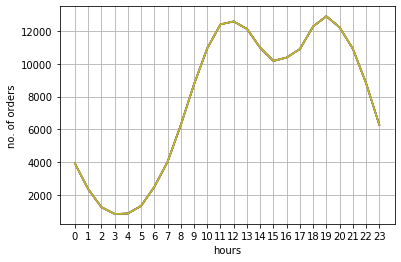

In [39]:
hours = [hours for hours, df in sales.groupby('hour')]
plt.plot(hours, sales.groupby(['hour']).count())
plt.grid()
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('no. of orders')
plt.show()

## Answer :-
#### My recommendation is slightly before 10 am and 6 pm is best time for advertisements

### Question 4: which product generating most revanue?

In [26]:
sales_by_Product = sales.groupby('Product').sum()
sales_by_Product

,Quantity Ordered,Price Each,month,total sales,hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


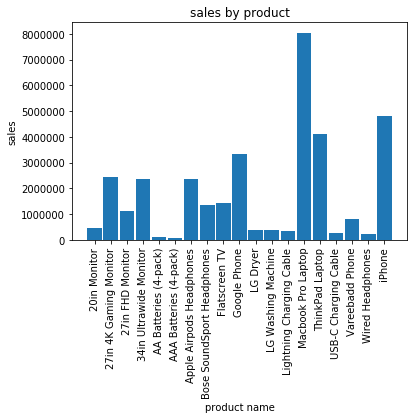

In [27]:
Product = [Product for Product, df in sales.groupby('Product')]
plt.bar(Product, sales_by_Product['total sales'], width=.9,)
plt.title('sales by product')
plt.xticks(Product, rotation ='vertical' )
plt.xlabel('product name')
plt.ylabel('sales')
plt.show()

## Answer :-
#### best revenue generating product is Macbook Pro Laptop followed by iPhone and ThinkPad Laptop.

### Question 5: Which products are most often sold together?

In [28]:
#ref :-https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
#      https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
product_groups = sales[sales['Order ID'].duplicated(keep=False)]
product_groups

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales,hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,Atlanta (GA),3.84,20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta (GA),11.99,0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta (GA),5.98,0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,San Francisco (CA),600.00,13


In [29]:
#ref :-https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
product_groups['groups'] = product_groups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
product_groups.head()

C:\Users\Dhani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales,hour,groups
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [30]:
product_groups = product_groups[['Order ID','groups']].drop_duplicates()
product_groups

,Order ID,groups
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [31]:
product_group_count = product_groups['groups'].value_counts()
product_group_count

iPhone,Lightning Charging Cable                                     882
Google Phone,USB-C Charging Cable                                   856
iPhone,Wired Headphones                                             361
Vareebadd Phone,USB-C Charging Cable                                312
Google Phone,Wired Headphones                                       303
                                                                   ... 
Google Phone,Flatscreen TV                                            1
LG Dryer,27in 4K Gaming Monitor                                       1
LG Dryer,27in FHD Monitor                                             1
27in FHD Monitor,Google Phone                                         1
Google Phone,Bose SoundSport Headphones,Lightning Charging Cable      1
Name: groups, Length: 366, dtype: int64

### Question 6: What product sold the most? 

In [32]:
sales.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.9,8


In [33]:
product_group = sales.groupby('Product').sum()
product_group

,Quantity Ordered,Price Each,month,total sales,hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


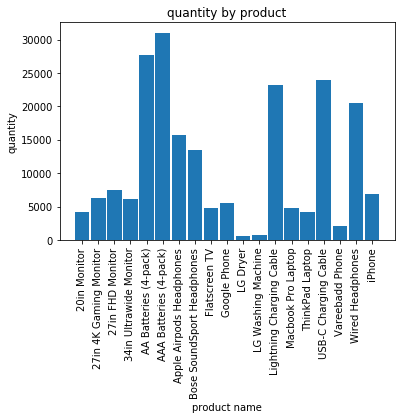

In [34]:
Product = [Product for Product, df in sales.groupby('Product')]
plt.bar(Product, product_group['Quantity Ordered'], width=.9,)
plt.title('quantity by product')
plt.xticks(Product, rotation ='vertical' )
plt.xlabel('product name')
plt.ylabel('quantity')
plt.show()

## Answer :-
#### best selling product is AAA Batteries (4-pack) followed by AA Batteries (4-pack) and USB-C Charging Cable.

### Question 7: Why do you think it sold the most?

In [35]:
avg_price = sales.groupby('Product').mean()
avg_price

,Quantity Ordered,Price Each,month,total sales,hour
Product,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458


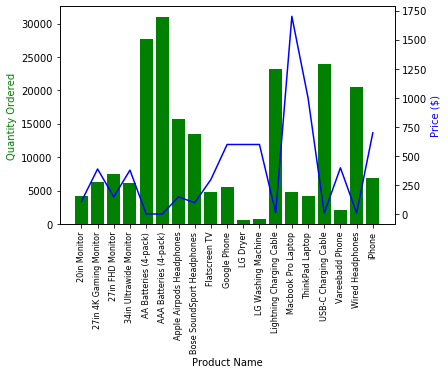

In [36]:
# Reff: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product, product_group['Quantity Ordered'], color='g')
ax2.plot(Product, avg_price['Price Each'], color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(Product, rotation='vertical', size=8)

plt.show()

## Answer :-
#### from this graph we can say that products with less price are tends to have higher sales and product with higher price tends to have small sales